# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [82]:
# Importing standard libraries
# ---
# 
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 

In [83]:
# Importing our dataset
# ---
#
train_df = pd.read_csv('https://bit.ly/38dSbSb')

print(train_df.shape)


(1258, 7)


In [84]:
train_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2016-12-23,41.599998,42.689999,41.542000,42.667999,42.667999,23352500
1254,2016-12-27,42.976002,44.450001,42.883999,43.905998,43.905998,29578500
1255,2016-12-28,44.306000,44.759998,43.439999,43.948002,43.948002,18912500
1256,2016-12-29,43.712002,43.840000,42.824001,42.936001,42.936001,20225000
1257,2016-12-30,43.259998,43.500000,42.335999,42.737999,42.737999,23213000


In [85]:
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [86]:
# Sample dataset
# ---
#
train_df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
976,2015-11-18,42.900002,44.276001,42.504002,44.214001,44.214001,14059500
852,2015-05-26,49.535999,50.400002,49.299999,49.492001,49.492001,17493500
181,2012-09-20,6.186000,6.300000,6.136000,6.180000,6.180000,4562000
392,2013-07-26,25.628000,26.136000,25.322001,25.878000,25.878000,48165500
192,2012-10-05,5.940000,5.962000,5.736000,5.778000,5.778000,4693000


In [87]:
# Statistical summary
# ---
#
train_df.describe() 

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [88]:
# Getting our train dataset
# ---
#
train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [89]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [90]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [91]:
X_train.shape

(1198, 60)

In [92]:
y_train.shape

(1198,)

In [93]:
# Previewing X_train
print(X_train)

[[0.00888719 0.00609079 0.00436698 ... 0.03436123 0.04037541 0.04275043]
 [0.00609079 0.00436698 0.0022218  ... 0.04037541 0.04275043 0.04432101]
 [0.00436698 0.0022218  0.00145566 ... 0.04275043 0.04432101 0.04175445]
 ...
 [0.71128134 0.71434589 0.71105156 ... 0.69565219 0.69480939 0.72116457]
 [0.71434589 0.71105156 0.67358745 ... 0.69480939 0.72116457 0.74663857]
 [0.71105156 0.67358745 0.66799466 ... 0.72116457 0.74663857 0.73526148]]


In [94]:
# Previewing y_train
# ---
#
print(y_train)

[0.04432101 0.04175445 0.04102662 ... 0.74663857 0.73526148 0.72660406]


In [95]:
# Reshaping 
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [96]:
X_train.shape

(1198, 60, 1)

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [97]:
# Building the RNN
# ---
#
# Importing the Keras libraries and packages
# ---
#
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [98]:
# Initialising the RNN (Recurrent Neural Network)
# ---
#
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# ---
# 'units' is the number of LSTM neurons in the layer
# 'return_sequences' is True as we need to add another LSTM layer after the current one.
# 'input_shape' corresponds to the number of time stamps and the number of indicators.
#  For 'Dropout', 20% of 50 neurons will be ignored randomly during each iteration of training.
# ---
# 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# ---
# 'return_sequences' is False as we will not add more LSTM layers after this one.
# ---
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer
# ---
# 'output dimension' is 1 since we are predicting 1 price each time.
# ---
#
regressor.add(Dense(units = 1))

In [99]:
# Compile the RNN 
# ---
#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [100]:
# Fitting the RNN to the training set
# ---
#
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 62ms/step - loss: 0.0489
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0115
Epoch 3/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0092
Epoch 4/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0075
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0073
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0075
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0076
Epoch 8/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0067
Epoch 9/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0063
Epoch 10/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0062
Epoch 11/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0064
Epoch 12/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0065
Epoch 13/100
38/38 [=====

In [101]:
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
print(test_df.shape)

(212, 7)


In [102]:
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [103]:
# Getting Test Dataset feature values
# ---
# NB: We are using the 'Open' feature
# ---
#
real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [104]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#
# We need to concatenate the train and test datasets for prediction, 
# because we use the previous 60 days' stock prices to predict the next-day price. 
# i.e. we need the 60 days' price before the 1st date in the test dataset.
# ---
#
dataset_total = pd.concat((train_df['Open'],
                           test_df['Open']), axis=0)

# We create the input for prediction, index starting from the 
# date 60 days before the first date in the test dataset.
# ---
#
inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)



In [105]:
len(inputs)

272

In [106]:
# Then creating the test data structure just as we did for the train dataset
# ---
#
X_test = []
for i in range(60, len(inputs)): 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],
                    X_test.shape[1], 1))

In [107]:
X_test.shape

(212, 60, 1)

In [108]:
dataset_total.shape

(1470,)

In [109]:
inputs = dataset_total[len(dataset_total)-len(test_df)-60:]
inputs

1198     40.492001
1199     40.200001
1200     40.270000
1201     40.369999
1202     40.189999
           ...    
207     409.959991
208     406.899994
209     394.000000
210     409.730011
211     430.619995
Name: Open, Length: 272, dtype: float64

In [110]:
inputs

1198     40.492001
1199     40.200001
1200     40.270000
1201     40.369999
1202     40.189999
           ...    
207     409.959991
208     406.899994
209     394.000000
210     409.730011
211     430.619995
Name: Open, Length: 272, dtype: float64

In [111]:
# Making our Predictions
# ---
#
predicted_stock_price = regressor.predict(X_test)

In [112]:
# Since we have predicted the scaled values, we reverse those values
# ---
#
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 44.780064]
 [ 65.65274 ]
 [ 89.62113 ]
 [ 87.17149 ]
 [ 89.1203  ]
 [ 86.44083 ]
 [ 90.25917 ]
 [100.06679 ]
 [ 91.608116]
 [ 86.42033 ]
 [ 92.49989 ]
 [ 95.301025]
 [100.52483 ]
 [ 94.20822 ]
 [ 96.841545]
 [ 90.3176  ]
 [ 98.9582  ]
 [ 96.98775 ]
 [107.424934]
 [101.423904]
 [108.78768 ]
 [135.96227 ]
 [104.65682 ]
 [ 90.76867 ]
 [122.93019 ]
 [119.32813 ]
 [102.26153 ]
 [118.42828 ]
 [103.103134]
 [121.86171 ]
 [119.25153 ]
 [126.865234]
 [115.05971 ]
 [121.28979 ]
 [106.26731 ]
 [124.16037 ]
 [ 99.58085 ]
 [106.88202 ]
 [ 90.45479 ]
 [119.82802 ]
 [119.3371  ]
 [ 99.76226 ]
 [105.22127 ]
 [103.34818 ]
 [ 88.579544]
 [111.69525 ]
 [ 96.96379 ]
 [ 88.59643 ]
 [100.277824]
 [ 74.7514  ]
 [ 76.853645]
 [ 71.4981  ]
 [ 69.210686]
 [ 77.3319  ]
 [ 79.12655 ]
 [ 84.61901 ]
 [ 95.71088 ]
 [ 91.92394 ]
 [ 83.08523 ]
 [ 89.716896]
 [ 88.12275 ]
 [ 89.23509 ]
 [ 85.09368 ]
 [ 91.98944 ]
 [ 90.34768 ]
 [ 96.236374]
 [ 95.03542 ]
 [ 95.55657 ]
 [101.01663 ]
 [118.20519 ]
 [111.98272 ]
 [102.

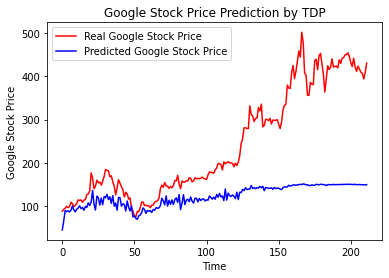

In [113]:
# Visualizing the results for predictions
# ---
#
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [114]:
# Model Evaluation 
# ---
#RMSE
# NB: This may not be very relevant here since we care about the direction of the price, not the exact price
# --
#
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

156.68231518263818


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

In [119]:
real_stock_price = sc.inverse_transform(real_stock_price)


In [123]:
print(real_stock_price.mean())

656388.5765159529


The neural networks regression model has an RSME less than 10% of the target mean hence the model can be used to predict the stock prices 

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?
Yes we have

#### b) Did we have the right data?
Yes we did

#### c) What can be done to improve the solution?

- Getting more training data
- Increasing the timesteps
- Adding some other indicators
- Adding more LSTM layers
- Adding more neurons in the LSTM layers